In [244]:
import pandas as pd
import numpy as np
from numpy import diff

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl

# import geopandas as gpd
import math

from matplotlib.patches import Circle, Wedge, Polygon

import os
import matplotlib.patheffects as path_effects


from netCDF4 import Dataset as NetCDFFile 

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from datetime import datetime, timezone

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})


# set the font globally
plt.rcParams.update({'font.family':'Helvetica'})

In [245]:
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')
data = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/time-series/data/SUeq_data.csv", header = 'infer')
# data.dtypes

# data = data[(data['MW'] >= 5.1)]

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

eq_data = data.sort_values(by ='YEARS', ascending=True) # this is an important step
# data = data[(data['DATE'] > '01-01-2003') & (data['DATE'] < '26-11-2004')]

In [246]:
# slab data
slab_length = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/time-series/data/depth_at_prof_50.csv", sep = ',', header = 'infer')
slab_length=slab_length.append(slab_length, ignore_index=True)
slab_length = slab_length.sort_values(by = 'ALONG',ascending=True)
length = np.asarray(slab_length['LENGTH'])

## x years before seismicity in the slab

In [247]:
figsize = (7,2.5)
dpi=200

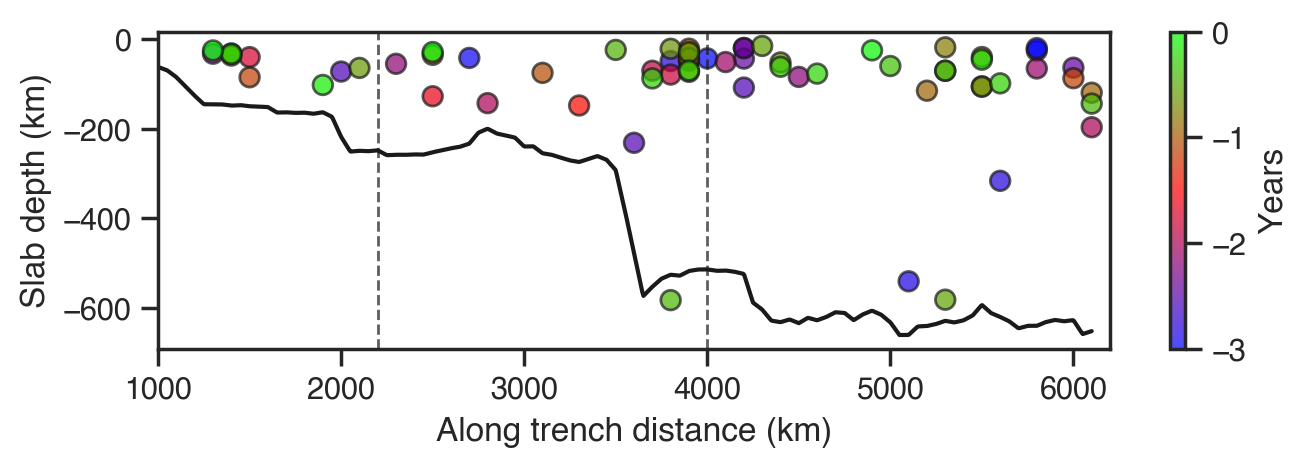

In [248]:
start_time = -3 # yrs before 2004 eq
end_time = 0


data_dgoing = eq_data[(eq_data['CLASS'] == 'DGOING') &
                         (eq_data['YEARS'] > start_time) & (eq_data['YEARS'] < end_time) &
                     (eq_data['DEPTH'] > 0)]

data_dgoing_thrust = data_dgoing[(data_dgoing['TYPE'] == 'THRUST') | (data_dgoing['TYPE'] == 'O_THRUST')]
data_dgoing_normal = data_dgoing[(data_dgoing['TYPE'] == 'NORM') | (data_dgoing['TYPE'] == 'O_NORM')]
data_dgoing_ss = data_dgoing[(data_dgoing['TYPE'] == 'SS')]


# load subduction depth data
depth_data = slab_length

# create cross section
cross_section = np.linspace(0, depth_data['ALONG'].max(), num=1000)

# interpolate depth data along cross section
depth_interp = np.interp(cross_section, depth_data['ALONG'], depth_data['LENGTH'])

# create depth levels to plot seismicity at
depth_levels = np.arange(0, depth_interp.max(), 10)

# load seismicity data
# seismicity_data = eq_data

# create plot
# figsize = (7,4)
# dpi=200

fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax
# fig2=ax[1]

# Plot seismicity within the slab cross section
s=50

# Define colormap and normalize time values to 0-1 range
cmap = plt.cm.get_cmap('brg') #spring #RdBu_r #brg #cubehelix
norm = plt.Normalize(vmin=start_time, vmax=end_time)

sc = fig1.scatter(data_dgoing['ALONG'], data_dgoing['DEPTH']*-1, s=s, alpha=0.7,
                  edgecolor='k', linewidth=1,
                  c=data_dgoing['YEARS'],
          cmap=cmap, norm=norm)

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, label='Years')

fig1.axvline(x= 4000, color="k", lw=1, ls='--', alpha=0.7)
fig1.axvline(x= 2200, color="k", lw=1, ls='--', alpha=0.7)

# Add cross section depth profile
fig1.plot(cross_section, depth_interp, c='k')

# Set axis labels
fig1.set_xlabel('Along trench distance (km)')
fig1.set_ylabel('Slab depth (km)')

# Set plot title
# ax.set_title('Slab Seismicity before')

fig1.set_xlim([1000, 6200])

plt.tight_layout()

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/efore_seismicity_dgoing.pdf"
            , dpi = 500, transparent= True, bbox_inches='tight')

## x years after slab seismicity

In [249]:
# start_time = 0 # yrs before 2004 eq
# end_time = 3


# data_dgoing = eq_data[(eq_data['CLASS'] == 'DGOING') &
#                          (eq_data['YEARS'] > start_time) & (eq_data['YEARS'] < end_time) &
#                      (eq_data['DEPTH'] > 0)]

# data_dgoing_thrust = data_dgoing[(data_dgoing['TYPE'] == 'THRUST') | (data_dgoing['TYPE'] == 'O_THRUST')]
# data_dgoing_normal = data_dgoing[(data_dgoing['TYPE'] == 'NORM') | (data_dgoing['TYPE'] == 'O_NORM')]
# data_dgoing_ss = data_dgoing[(data_dgoing['TYPE'] == 'SS')]


# # load subduction depth data
# depth_data = slab_length

# # create cross section
# cross_section = np.linspace(0, depth_data['ALONG'].max(), num=1000)

# # interpolate depth data along cross section
# depth_interp = np.interp(cross_section, depth_data['ALONG'], depth_data['LENGTH'])

# # create depth levels to plot seismicity at
# depth_levels = np.arange(0, depth_interp.max(), 10)

# # load seismicity data
# # seismicity_data = eq_data

# # create plot
# # figsize = (7,4)
# # dpi=200

# fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
# fig1=ax
# # fig2=ax[1]

# # Plot seismicity within the slab cross section
# s=50

# # Define colormap and normalize time values to 0-1 range
# cmap = plt.cm.get_cmap('winter_r') #spring #RdBu_r #brg
# norm = plt.Normalize(vmin=start_time, vmax=end_time)

# sc = fig1.scatter(data_dgoing['ALONG'], data_dgoing['DEPTH']*-1, s=s, alpha=0.7,
#                   edgecolor='k', linewidth=1,
#                   c=data_dgoing['YEARS'],
#           cmap=cmap, norm=norm)

# # Add a colorbar
# cbar = plt.colorbar(sc, ax=ax, label='Years')

# fig1.axvline(x= 4000, color="k", lw=1, ls='--', alpha=0.7)
# fig1.axvline(x= 2200, color="k", lw=1, ls='--', alpha=0.7)

# # Add cross section depth profile
# fig1.plot(cross_section, depth_interp, c='k')

# # Set axis labels
# fig1.set_xlabel('Along trench distance (km)')
# fig1.set_ylabel('Slab depth (km)')

# # Set plot title
# # ax.set_title('Slab Seismicity before')

# # fig1.set_ylim([-750, -50])

# # Show plot
# plt.show()

# plt.tight_layout()

# # fig1.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/Before_seismicity_dgoing.pdf"
# #             , dpi = 500, transparent= True, bbox_inches='tight')